<a href="https://colab.research.google.com/github/jasmehla/INTERNSHIP_TASKS_colab/blob/main/SCT_DS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving archive (4).zip to archive (4).zip


In [2]:
import zipfile
import os
# Replace with your uploaded filename
with zipfile.ZipFile("archive (4).zip", "r") as zip_ref:
    zip_ref.extractall("accident_data")  # or any folder you want
# List extracted files
os.listdir("accident_data")

['UK_Accident.csv']

In [5]:
import pandas as pd

df = pd.read_csv("accident_data/UK_Accident.csv")
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [6]:
# Basic info
df.info()
# statistics
df.describe()
# Checking missing value
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

,0
Carriageway_Hazards,1476900
Special_Conditions_at_Site,1467568
Junction_Control,602835
LSOA_of_Accident_Location,108238
Time,117
Location_Easting_OSGR,101
Longitude,101
Pedestrian_Crossing-Physical_Facilities,34
Pedestrian_Crossing-Human_Control,17


In [8]:
# Drop unnecessary or mostly-empty columns
df = df.dropna(thresh=len(df)*0.9, axis=1)

# Convert time column
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Extract time parts
df['Hour'] = df['Time'].dt.hour
df['Day'] = df['Time'].dt.dayofweek
df['Month'] = df['Time'].dt.month

/tmp/ipython-input-8-4132965792.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce')


/tmp/ipython-input-9-1191777967.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='flare')


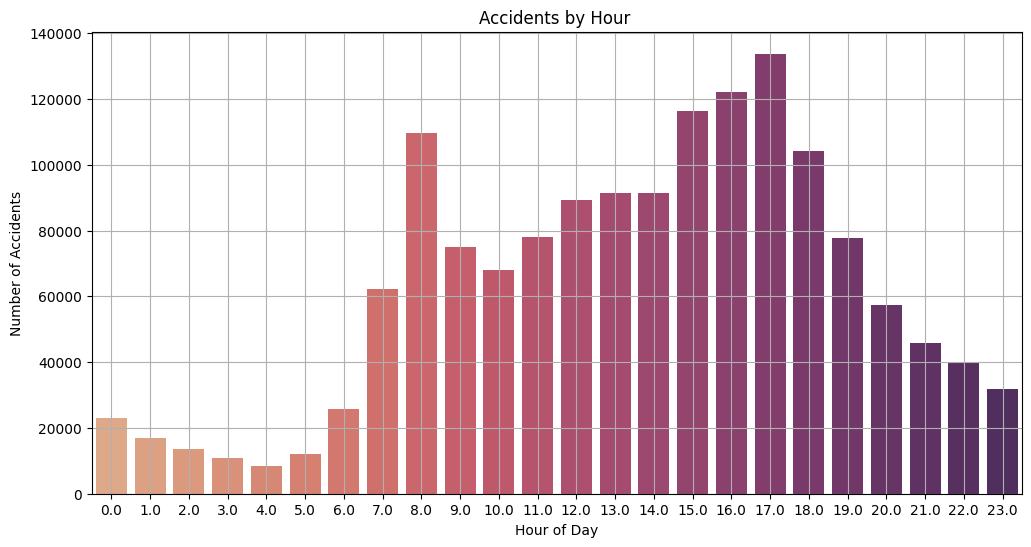

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x='Hour', data=df, palette='flare')
plt.title("Accidents by Hour ")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()

/tmp/ipython-input-12-2188376089.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weather.values, y=top_weather.index, palette="mako")


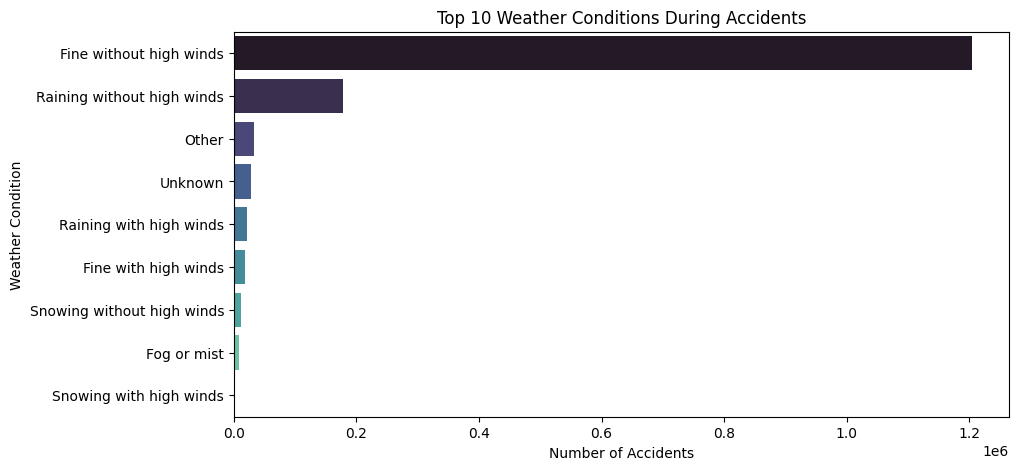

In [12]:
top_weather = df['Weather_Conditions'].value_counts().nlargest(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_weather.values, y=top_weather.index, palette="mako")
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.show()

In [15]:
import folium

# Sample for performance
sample_df = df.dropna(subset=['Latitude', 'Longitude']).sample(1000)

m = folium.Map(location=[51.5, -0.1], zoom_start=6) # Changed location to UK for better visualization
for _, row in sample_df.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=2, color='crimson', fill=True).add_to(m)
m.save("accident_hotspots_map.html")
print("✅ Map saved as 'accident_hotspots_map.html'")

✅ Map saved as 'accident_hotspots_map.html'


In [16]:
print(df.columns)

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year', 'Hour', 'Day', 'Month'],
      dtype='object')
